In [60]:
import numpy as np

In [61]:
import pandas as pd

In [62]:
np.random.seed(42)

In [63]:
employee= [f"EMP_{i:03d}" for i in range(1,31)]

In [64]:
dates = pd.date_range(start="2025-07-01",periods=30,freq="D")

In [65]:
employee

['EMP_001',
 'EMP_002',
 'EMP_003',
 'EMP_004',
 'EMP_005',
 'EMP_006',
 'EMP_007',
 'EMP_008',
 'EMP_009',
 'EMP_010',
 'EMP_011',
 'EMP_012',
 'EMP_013',
 'EMP_014',
 'EMP_015',
 'EMP_016',
 'EMP_017',
 'EMP_018',
 'EMP_019',
 'EMP_020',
 'EMP_021',
 'EMP_022',
 'EMP_023',
 'EMP_024',
 'EMP_025',
 'EMP_026',
 'EMP_027',
 'EMP_028',
 'EMP_029',
 'EMP_030']

In [66]:
data={
    "Date":np.tile(dates,len(employee)),
    "employee":np.repeat(employee,len(dates)),
    "working_hours":np.random.normal(loc=30,scale=5,size=len(dates)*len(employee))
}

In [67]:
df=pd.DataFrame(data)

In [68]:
df

,Date,employee,working_hours
0,2025-07-01,EMP_001,32.483571
1,2025-07-02,EMP_001,29.308678
2,2025-07-03,EMP_001,33.238443
3,2025-07-04,EMP_001,37.615149
4,2025-07-05,EMP_001,28.829233
...,...,...,...
895,2025-07-26,EMP_030,33.243549
896,2025-07-27,EMP_030,29.164410
897,2025-07-28,EMP_030,30.733568
898,2025-07-29,EMP_030,36.032545


In [69]:
df.to_csv("employee_working_hours.csv",index=False)

In [70]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [71]:
df_csv

,Date,employee,working_hours
0,2025-07-01,EMP_001,32.483571
1,2025-07-02,EMP_001,29.308678
2,2025-07-03,EMP_001,33.238443
3,2025-07-04,EMP_001,37.615149
4,2025-07-05,EMP_001,28.829233
...,...,...,...
895,2025-07-26,EMP_030,33.243549
896,2025-07-27,EMP_030,29.164410
897,2025-07-28,EMP_030,30.733568
898,2025-07-29,EMP_030,36.032545


In [72]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["employee"].nunique())

         Date employee  working_hours
0  2025-07-01  EMP_001      32.483571
1  2025-07-02  EMP_001      29.308678
2  2025-07-03  EMP_001      33.238443
3  2025-07-04  EMP_001      37.615149
4  2025-07-05  EMP_001      28.829233
       working_hours
count     900.000000
mean       30.091926
std         4.904530
min        13.793663
25%        26.745590
50%        30.092131
75%        33.246901
max        49.263657
30


In [73]:
total_hours = df_csv.groupby("employee")["working_hours"].sum().sort_values(ascending=False)
print(total_hours)

employee
EMP_030    962.606134
EMP_021    949.712002
EMP_011    942.282391
EMP_006    941.817993
EMP_013    934.225898
EMP_029    931.906799
EMP_026    928.785713
EMP_028    922.726849
EMP_010    916.074819
EMP_020    913.164300
EMP_007    909.838848
EMP_008    907.205434
EMP_016    906.985293
EMP_014    904.314773
EMP_027    903.784449
EMP_003    901.932716
EMP_004    896.962256
EMP_024    894.304245
EMP_015    891.394231
EMP_019    886.585246
EMP_005    885.756283
EMP_002    881.825629
EMP_023    880.485134
EMP_022    879.695120
EMP_009    878.485218
EMP_001    871.777966
EMP_017    870.315585
EMP_025    869.284734
EMP_012    869.016727
EMP_018    849.480581
Name: working_hours, dtype: float64


In [74]:
avg_daily = df_csv.groupby("employee")["working_hours"].mean()

In [78]:
threshold_low=5
threshold_high=9
df_csv["low_hours_flag"] = df_csv["working_hours"] < threshold_low
df_csv["high_hours_flag"] = df_csv["working_hours"] > threshold_high

print(df_csv[df_csv["low_hours_flag"] | df_csv["high_hours_flag"]].head())

         Date employee  working_hours  low_hours_flag  high_hours_flag
0  2025-07-01  EMP_001      32.483571           False             True
1  2025-07-02  EMP_001      29.308678           False             True
2  2025-07-03  EMP_001      33.238443           False             True
3  2025-07-04  EMP_001      37.615149           False             True
4  2025-07-05  EMP_001      28.829233           False             True


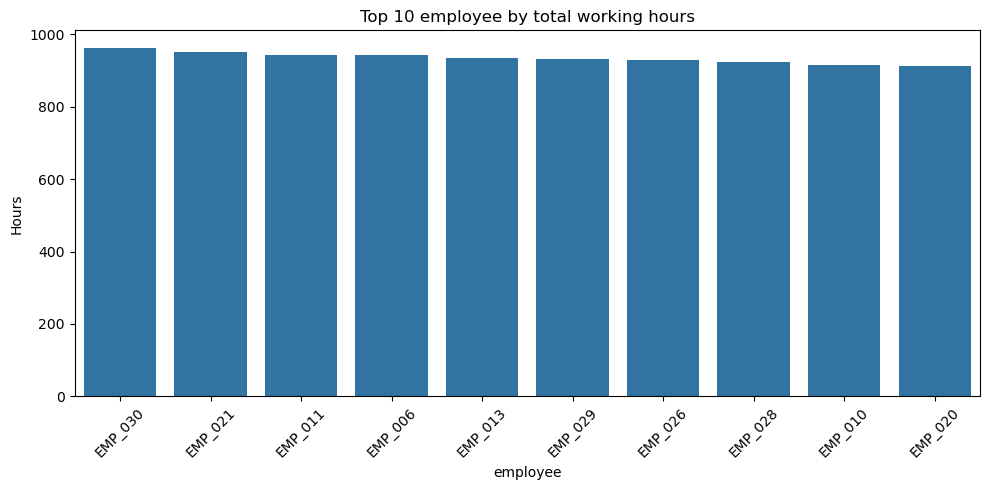

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 employee by total working hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()